In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Laoding data
df_tracks = pd.read_csv('data/spotify_tracks_20251118_224133.csv')
df_artists = pd.read_csv('data/spotify_artists_20251118_224133.csv')
df_recent = pd.read_csv('data/spotify_recent_20251118_224133.csv')

print("🎵 YOUR SPOTIFY DATA LOADED!\n")
print("=" * 60)
print(f"Total tracks: {len(df_tracks)}")
print(f"Unique tracks: {df_tracks['track_name'].nunique()}")
print(f"Unique artists: {df_tracks['artist_name'].nunique()}")
print("=" * 60)


🎵 YOUR SPOTIFY DATA LOADED!

Total tracks: 150
Unique tracks: 116
Unique artists: 102


In [3]:
# Quick insights
print("\n📊 QUICK INSIGHTS:\n")

# Most popular track
top_track = df_tracks.loc[df_tracks['popularity'].idxmax()]
print(f"Your most popular track: {top_track['track_name']} by {top_track['artist_name']} (popularity: {top_track['popularity']})")

# Average popularity
avg_pop = df_tracks['popularity'].mean()
print(f"Average popularity of your tracks: {avg_pop:.1f}/100")

# Longest song
longest = df_tracks.loc[df_tracks['duration_min'].idxmax()]
print(f"Your longest track: {longest['track_name']} ({longest['duration_min']:.2f} minutes)")

# Most listened artist
top_artist = df_tracks['artist_name'].value_counts().head(1)
print(f"Your most frequent artist: {top_artist.index[0]} ({top_artist.values[0]} tracks)")


📊 QUICK INSIGHTS:

Your most popular track: Cheri Cheri Lady by Modern Talking (popularity: 80)
Average popularity of your tracks: 46.5/100
Your longest track: Soul's Lament - DJ Sneak Remix (8.98 minutes)
Your most frequent artist: Just Kiddin (5 tracks)


In [4]:
# Genre analysis
print("\n🎸 TOP GENRES:")
# Get genres from artists
artist_genres = df_artists[df_artists['time_range'] == 'Last 6 months']['genres'].str.split(', ', expand=True).stack().value_counts().head(5)
for idx, (genre, count) in enumerate(artist_genres.items(), 1):
    print(f"{idx}. {genre} ({count} artists)")


🎸 TOP GENRES:
1. afrobeats (4 artists)
2. 3 step (4 artists)
3. afrobeat (4 artists)
4. Unknown (3 artists)
5. private school piano (3 artists)


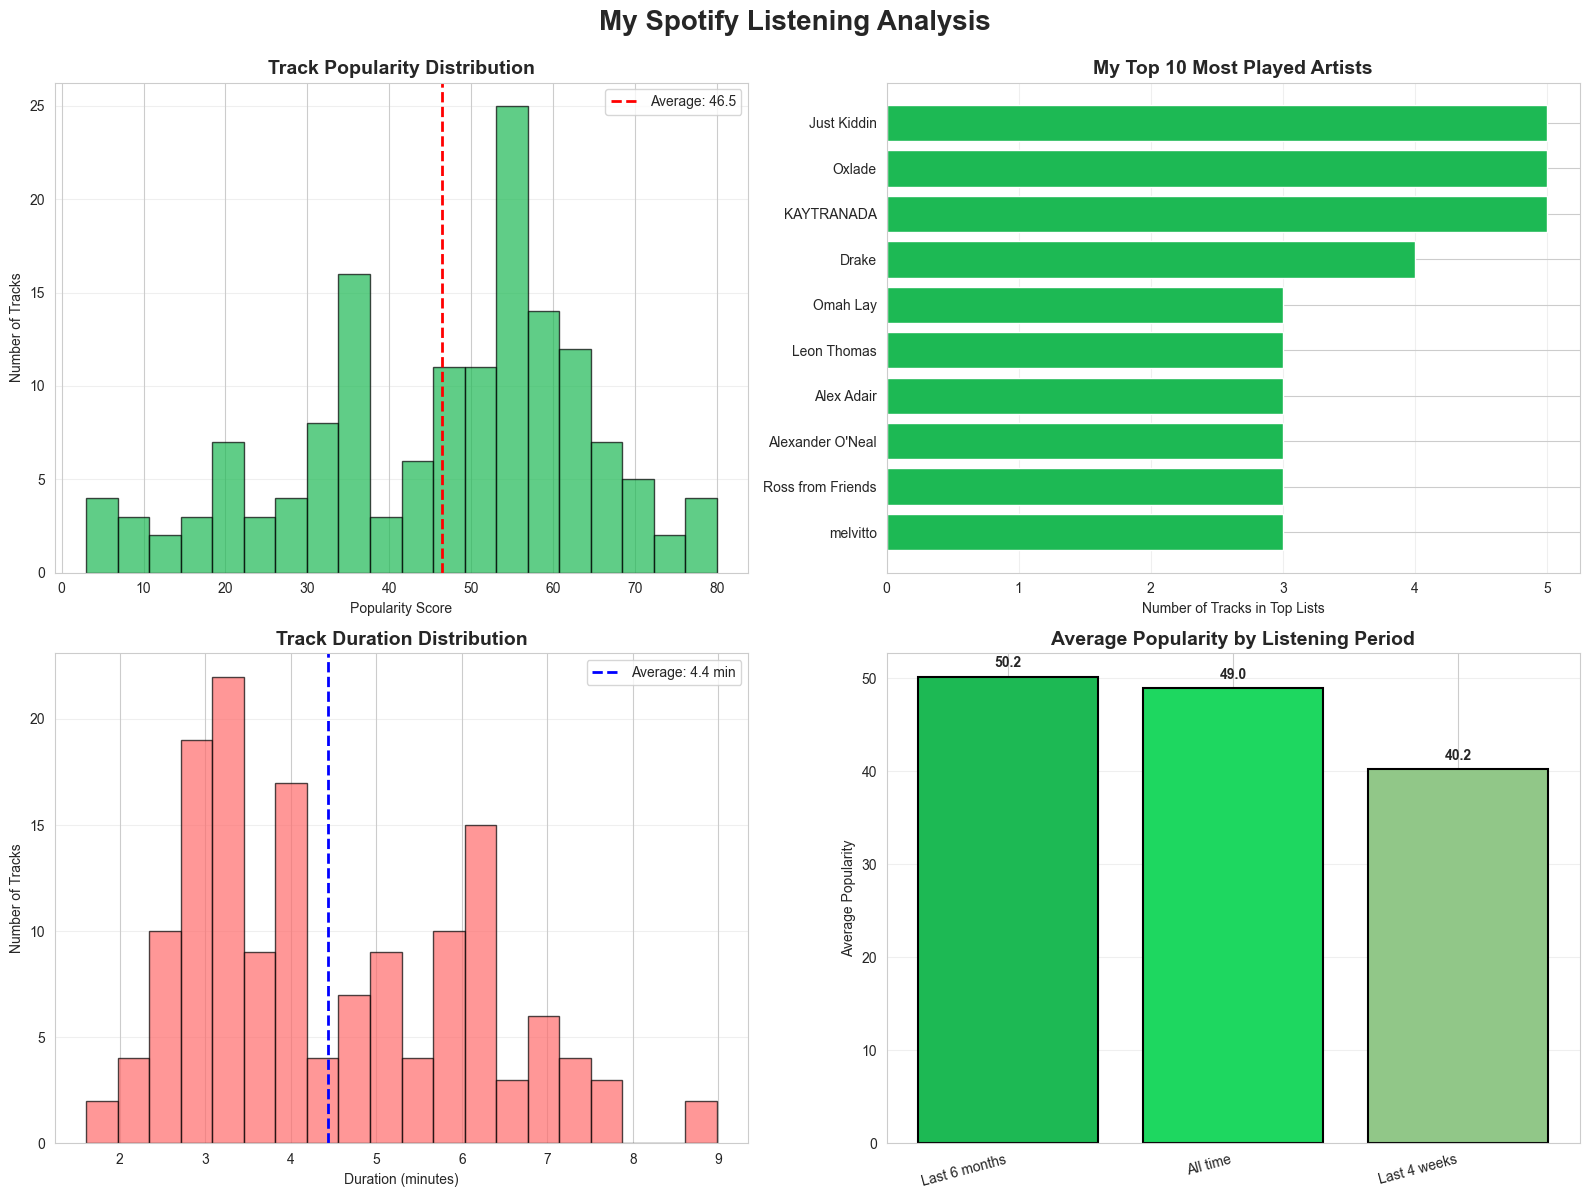


✅ Visualization saved as 'spotify_analysis_overview.png'

📊 KEY INSIGHTS:
1. You prefer underground/niche music (avg popularity: 46.5)
2. Your average track length is 4.4 minutes
3. Your top artist (Just Kiddin) appears 5 times in your top tracks
4. Track diversity: 77.3% of your tracks are unique


In [5]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create a 2x2 grid of visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('My Spotify Listening Analysis', fontsize=20, fontweight='bold', y=0.995)

# 1. Popularity Distribution
axes[0, 0].hist(df_tracks['popularity'], bins=20, color='#1DB954', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_tracks['popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Average: {df_tracks["popularity"].mean():.1f}')
axes[0, 0].set_title('Track Popularity Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Popularity Score')
axes[0, 0].set_ylabel('Number of Tracks')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Top 10 Artists
top_artists = df_tracks['artist_name'].value_counts().head(10)
axes[0, 1].barh(range(len(top_artists)), top_artists.values, color='#1DB954')
axes[0, 1].set_yticks(range(len(top_artists)))
axes[0, 1].set_yticklabels(top_artists.index)
axes[0, 1].set_title('My Top 10 Most Played Artists', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Tracks in Top Lists')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Duration Distribution
axes[1, 0].hist(df_tracks['duration_min'], bins=20, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(df_tracks['duration_min'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Average: {df_tracks["duration_min"].mean():.1f} min')
axes[1, 0].set_title('Track Duration Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Duration (minutes)')
axes[1, 0].set_ylabel('Number of Tracks')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Popularity by Time Range
time_range_pop = df_tracks.groupby('time_range')['popularity'].mean().sort_values(ascending=False)
colors_time = ['#1DB954', '#1ED760', '#91C788']
axes[1, 1].bar(range(len(time_range_pop)), time_range_pop.values, color=colors_time, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xticks(range(len(time_range_pop)))
axes[1, 1].set_xticklabels(time_range_pop.index, rotation=15, ha='right')
axes[1, 1].set_title('Average Popularity by Listening Period', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Popularity')
axes[1, 1].grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(time_range_pop.values):
    axes[1, 1].text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/spotify_analysis_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'spotify_analysis_overview.png'")
print("\n📊 KEY INSIGHTS:")
print(f"1. You prefer {'mainstream' if df_tracks['popularity'].mean() > 60 else 'underground/niche'} music (avg popularity: {df_tracks['popularity'].mean():.1f})")
print(f"2. Your average track length is {df_tracks['duration_min'].mean():.1f} minutes")
print(f"3. Your top artist ({top_artists.index[0]}) appears {top_artists.values[0]} times in your top tracks")
print(f"4. Track diversity: {(df_tracks['track_name'].nunique() / len(df_tracks) * 100):.1f}% of your tracks are unique")

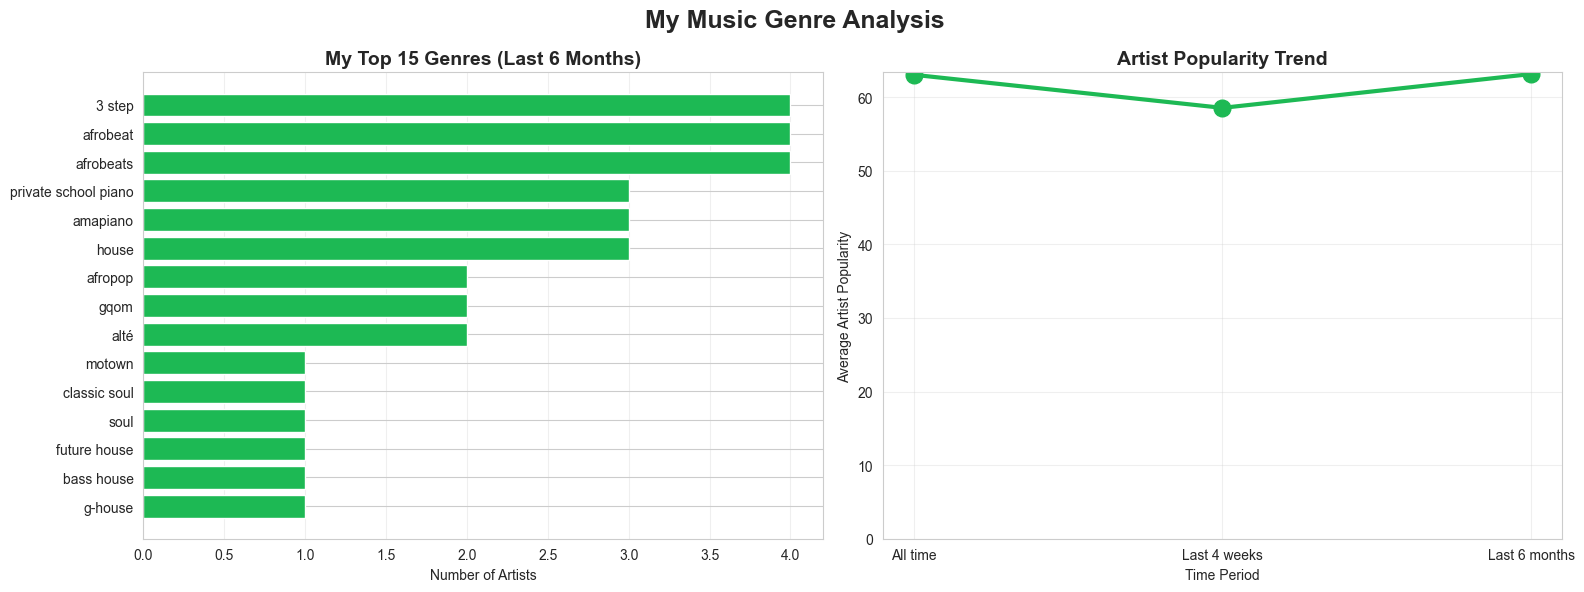


✅ Genre visualization saved as 'spotify_genre_analysis.png'

🎸 You listen to 15 different genres!
Top 3 genres: 3 step, afrobeat, afrobeats


In [6]:
# Genre Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('My Music Genre Analysis', fontsize=18, fontweight='bold')

# Get all genres from artists (Last 6 months)
df_artists_recent = df_artists[df_artists['time_range'] == 'Last 6 months'].copy()

# Split genres and count
all_genres = []
for genres_str in df_artists_recent['genres'].dropna():
    if genres_str != 'Unknown':
        all_genres.extend([g.strip() for g in genres_str.split(',')])

genre_counts = pd.Series(all_genres).value_counts().head(15)

# Plot 1: Top 15 Genres
axes[0].barh(range(len(genre_counts)), genre_counts.values, color='#1DB954')
axes[0].set_yticks(range(len(genre_counts)))
axes[0].set_yticklabels(genre_counts.index, fontsize=10)
axes[0].set_title('My Top 15 Genres (Last 6 Months)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Artists')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Artist Popularity by Time Range
time_artist_pop = df_artists.groupby('time_range')['popularity'].mean()
axes[1].plot(time_artist_pop.index, time_artist_pop.values, marker='o', linewidth=3, markersize=12, color='#1DB954')
axes[1].set_title('Artist Popularity Trend', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Artist Popularity')
axes[1].set_xlabel('Time Period')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('visualizations/spotify_genre_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Genre visualization saved as 'spotify_genre_analysis.png'")
print(f"\n🎸 You listen to {len(genre_counts)} different genres!")
print(f"Top 3 genres: {', '.join(genre_counts.head(3).index)}")

In [7]:
df_artists_recent = df_artists[df_artists['time_range'] == 'Last 6 months']

# Function to find artists by genre
def find_artists_by_genre(genre_keyword):
    mask = df_artists_recent['genres'].str.contains(genre_keyword, case=False, na=False)
    artists = df_artists_recent[mask][['artist_name', 'genres', 'popularity']].drop_duplicates()
    return artists.sort_values('popularity', ascending=False)

print("🎹 WHO ARE YOUR 'PRIVATE SCHOOL PIANO' ARTISTS?")
print("=" * 60)
print(find_artists_by_genre('private school piano'))

print("\n\n🕺 WHO ARE YOUR '3 STEP' ARTISTS?")
print("=" * 60)
print(find_artists_by_genre('3 step'))

print("\n\n🌍 WHO ARE YOUR 'AFROBEATS' ARTISTS?")
print("=" * 60)
print(find_artists_by_genre('afrobeat'))

🎹 WHO ARE YOUR 'PRIVATE SCHOOL PIANO' ARTISTS?
       artist_name                                    genres  popularity
21     Kelvin Momo    private school piano, amapiano, 3 step          64
36  Artwork Sounds  3 step, private school piano, deep house          48
26     Gaba Cannal      private school piano, amapiano, gqom          45


🕺 WHO ARE YOUR '3 STEP' ARTISTS?
       artist_name                                    genres  popularity
21     Kelvin Momo    private school piano, amapiano, 3 step          64
39   Dlala Thukzin                    3 step, gqom, amapiano          62
36  Artwork Sounds  3 step, private school piano, deep house          48
32        Mpho.Wav             afro tech, 3 step, afro house          34


🌍 WHO ARE YOUR 'AFROBEATS' ARTISTS?
   artist_name                         genres  popularity
24    Omah Lay   afrobeats, afrobeat, afropop          74
23      Oxlade   afrobeats, afrobeat, afropop          62
25    melvitto      afrobeats, afrobeat, alté    